In [1]:
import lentil
import numpy as np
import lentil as le
import matplotlib.pyplot as plt

In [12]:
wavelength = 500e-9
dx = 1/240
du = 5e-6
focal_length = 10
oversample = 2

pad_length = np.round((focal_length*wavelength*oversample)/(dx*du)).astype(int)
pad_length = np.broadcast_to(pad_length, (2,))
print(pad_length)

amp = le.circle((256,256),120)
opd = le.zernike(amp, 4)*1000e-9

[480 480]


(1200, 1200) [2500 2500]


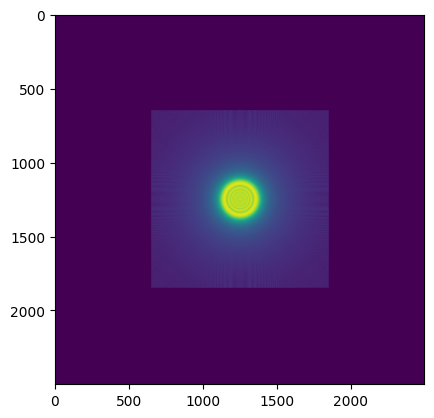

In [9]:
amp = le.circle((256,256),120)
opd = le.zernike(amp, 4)*1000e-9
dx = 1/240
focal_length = 10

p = le.Pupil(amplitude=amp, phase=opd, pixelscale=dx, focal_length=focal_length)
w = le.Wavefront(500e-9)

w = w * p

w2 = le.propagate.propagate_fft(w, pixelscale=5e-6, shape=(500,500), oversample=5)

plt.imshow(w2.intensity**0.2)

In [3]:
w3 = le.propagate.propagate_dft(w, pixelscale=5e-6, shape=(100,100), oversample=5)
np.sum(w3.intensity)

44990.267016987666

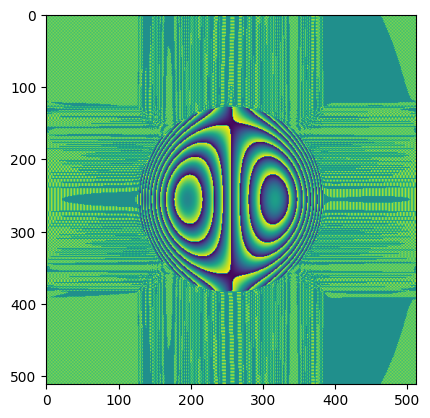

In [98]:
wl = 500e-9
z = 10
k = 2*np.pi/wl
du = 5e-6
diam = 1
dx = 1/256

amp = le.circle((256,256), 128)
opd = le.zernike(amp, 8)*1e-6

phasor = amp*np.exp(2*np.pi*1j/wl*opd)
pupil = le.pad(phasor, (512,512))

image = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(pupil), norm='ortho'))

z = 10
du = wl*10/2
rr, cc = le.helper.mesh(image.shape)
rr *= du
cc *= du
c = np.exp(1j*k*z)/(1j*wl*z)*np.exp(1j*k/(2*z)*(rr**2+cc**2))

image *= c

pupil2 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(image), norm='ortho'))


dx = 5e-6
rr, cc = le.helper.mesh(pupil2.shape)
rr *= dx
cc *= dx
c2 = np.exp(1j*k*z)/(1j*wl*z)*np.exp(1j*k/(2*z)*(rr**2+cc**2))

pupil2 *= c2
pupil2 *= le.pad(amp, (512,512))

plt.imshow(np.angle(pupil2))